# ECE367 PS03 Problem 3.11: Eigenfaces and $l_2$ Projection

## Tasks

- [x] Download and load `yalefaces.mat`.
- [x] Reshape to `1024 x 2414` from `32 x 32 x 2414`.
- [x] Calculate mean data point, plot mean face.
- [x] Translate all faces to origin using mean face. 
- [x] $C = XX^T = N\text{covariance}(X)$.
- [ ] a) Connection between singular values of $X$ and eigenvalues of $C$.
- [x] b) Compute eigenvalue/eigenvector pairs for $C$. Comment on whether they are real. 
    - [x] Plot $\lambda_j$ vs. $j$ and include in solution.
- [x] c) Plot the top and bottom 10 eigenfaces. Comment on differences.
- [ ] d) Create a function to project an image onto a subset of the basis vectors.
    - [ ] Run it on the required images and subsets.
    - [ ] Show all 30 images.
- [ ] e) Create a function to determine projection coefficients on a subset of the principal components.
    - [ ] Project the required faces onto the first 25 basis vectors.
    - [ ] Calculate pairwise Euclidean distances between each of the projections and tabulate the values.
    - [ ] Comment on how to make a face recognizer.

In [95]:
using Images, Plots, TestImages
using ImageShow
using Colors
using Statistics
using FileIO
using LinearAlgebra
using MAT
using Plots

In [96]:
# Some Governing Constants

im_dims = (32,32);

vars = matread("yalefaces.mat");
faces = vars["M"]/255;
images = reshape(faces, (32*32, 2414));

In [97]:
function back_to_2d(image_arry, im_dims)
    return reshape(image_arry, im_dims)
end

function get_max_1(image_arry)
    return (image_arry/maximum(image_arry))
end

get_max_1 (generic function with 1 method)

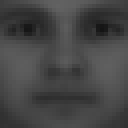

In [98]:
# Calculating Average Face

avg_face = sum(images, dims=2)/size(images, 2)
Gray.(back_to_2d(avg_face, im_dims))

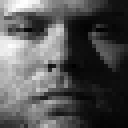

In [99]:
# Plotting some random face.
Gray.(back_to_2d(images[:,22], im_dims))

In [100]:
# Subtracting the average face from the dataset.
for i = 1:size(images,2)
    images[:,i] -= avg_face
end

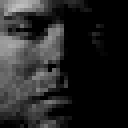

In [101]:
# Plotting some random face minus the average.
Gray.(back_to_2d(images[:,22], im_dims))

In [102]:
# Finding the covariance(ish) matrix.
C = images*transpose(images)/size(images,2);
# Solving for the eigen decomposition of the faces.
F = eigen(C)

λ = F.values
V = F.vectors


img=Gray.(back_to_2d(get_max_1(V[:,1023]), im_dims))

typeof(img)

Array{Gray{Float64},2}

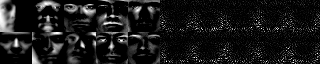

In [103]:
# The mosaic view does not seem to work properly without having a sample 'real' RGBX-based image to show
# We are basically just creating a 'set' for the program to visualize properly out of the 100 top PCA examples.

k = 10

pca1 = Gray.(back_to_2d(get_max_1(V[:,1023]), im_dims))

set = [pca1]

# k-=1

for i = 2:k
    set = append!(set, [Gray.(back_to_2d(get_max_1(V[:,1024-i]), im_dims))] )
end

for i = 1:k
    set = append!(set, [Gray.(back_to_2d(get_max_1(V[:,i]), im_dims))] )
end

A = mosaicview(set, nrow=2,ncol=10)

# println("Done computation")

In [104]:
save("top_bottom_10.png", RGBX.(A)) #Saving the mosaic output.

23118

In [112]:
plot(λ)

<!DOCTYPE html>
 
 
 Plots.jl

In [162]:
function get_proj_coeffs(img_vec, V, k)
    coeffs = zeros(k)
    
    for i = 1:k
        coeffs[i] = dot(img_vec, V[:,1025-i])
    end
    
    return coeffs
end

function reconstruct_from_coeffs(coeffs, V, avg_face)
    reconstruct = copy(avg_face)
    for i = 1:size(coeffs,1) 
        reconstruct += V[:,1025-i]*coeffs[i]
    end
    
    return get_max_1(reconstruct)
end

reconstruct_from_coeffs (generic function with 2 methods)

In [209]:
function show_reconstruct(face_num, order)
    k = order

    coeffs = get_proj_coeffs(images[:,face_num], V, k)
    reconstruct = reconstruct_from_coeffs(coeffs, V, avg_face);

#     println("Reconstruction; Original")
#     return [Gray.(back_to_2d(reconstruct, im_dims)) Gray.(get_max_1(back_to_2d(images[:,face_num]+avg_face, im_dims)))]
    return Gray.(back_to_2d(reconstruct, im_dims))
end

show_reconstruct (generic function with 1 method)

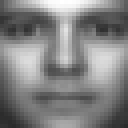

In [210]:
show_reconstruct(2, 6)

In [219]:
img_inds = [1, 1076, 2043]
accs = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

set = [show_reconstruct(img_inds[1], accs[1])]

for i = 1:10
    for j = 1:3
        c = show_reconstruct(img_inds[j], accs[i])
        if i != 1 || j != 1
            set = append!(set, [c] )
        end
    end
end

A = mosaicview(set, nrow=3,ncol=10)

save("projections.png", RGBX.(A)) #Saving the mosaic output.

37651

In [222]:
I1 = [1 2 7 2043 2044 2045]

Coeffs = zeros(25, 6)

for i = 1:6
    Coeffs[:,i] = get_proj_coeffs(images[:,I1[i]], V, 25)
end

In [224]:
for i = 1:5
    for j = i+1:6
        euc_dist = norm(Coeffs[:,i] - Coeffs[:,j])
        println("i: ",i,"; j: ",j," => ", euc_dist)
    end
end

i: 1; j: 2 => 2.324718264470165
i: 1; j: 3 => 1.8525992183972875
i: 1; j: 4 => 4.245540532925109
i: 1; j: 5 => 5.991480961254487
i: 1; j: 6 => 5.356871184687975
i: 2; j: 3 => 1.5381937356655304
i: 2; j: 4 => 5.504999434433608
i: 2; j: 5 => 7.461832224375202
i: 2; j: 6 => 6.3229810893906215
i: 3; j: 4 => 4.956899681915511
i: 3; j: 5 => 7.022535289269725
i: 3; j: 6 => 6.19188745064867
i: 4; j: 5 => 2.9756750686724334
i: 4; j: 6 => 2.6714709875212983
i: 5; j: 6 => 3.24857261017142
